In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
total_state_data = pd.read_csv('../../SharedData/total_state_data.csv')

In [3]:
energy_by_source_final = pd.read_csv('../../SharedData/dataset-generation-final/energy-by-source-final.csv')

In [4]:
energy_by_source_final.head()

,state,year,month,date,monthly_energy_renew,monthly_energy_fossil,monthly_energy_total,yearly_energy_renew,yearly_energy_fossil,yearly_energy_total,monthly_renew_pct,monthly_fossil_pct,yearly_renew_pct,yearly_fossil_pct
0,AL,1990,1,1990-01,NaN,NaN,NaN,10366507,54816918,79652133,NaN,NaN,0.130147,0.688204
1,AL,1990,2,1990-02,NaN,NaN,NaN,10366507,54816918,79652133,NaN,NaN,0.130147,0.688204
2,AL,1990,3,1990-03,NaN,NaN,NaN,10366507,54816918,79652133,NaN,NaN,0.130147,0.688204
3,AL,1990,4,1990-04,NaN,NaN,NaN,10366507,54816918,79652133,NaN,NaN,0.130147,0.688204
4,AL,1990,5,1990-05,NaN,NaN,NaN,10366507,54816918,79652133,NaN,NaN,0.130147,0.688204


In [5]:
energy_by_source_monthly = energy_by_source_final[['state','date','monthly_energy_renew','monthly_energy_fossil','monthly_energy_total']]

In [6]:
energy_by_source_monthly.head()

,state,date,monthly_energy_renew,monthly_energy_fossil,monthly_energy_total
0,AL,1990-01,NaN,NaN,NaN
1,AL,1990-02,NaN,NaN,NaN
2,AL,1990-03,NaN,NaN,NaN
3,AL,1990-04,NaN,NaN,NaN
4,AL,1990-05,NaN,NaN,NaN


In [7]:
energy_by_source_monthly.groupby(['state','date']).sum()
states = energy_by_source_monthly['state'].unique()

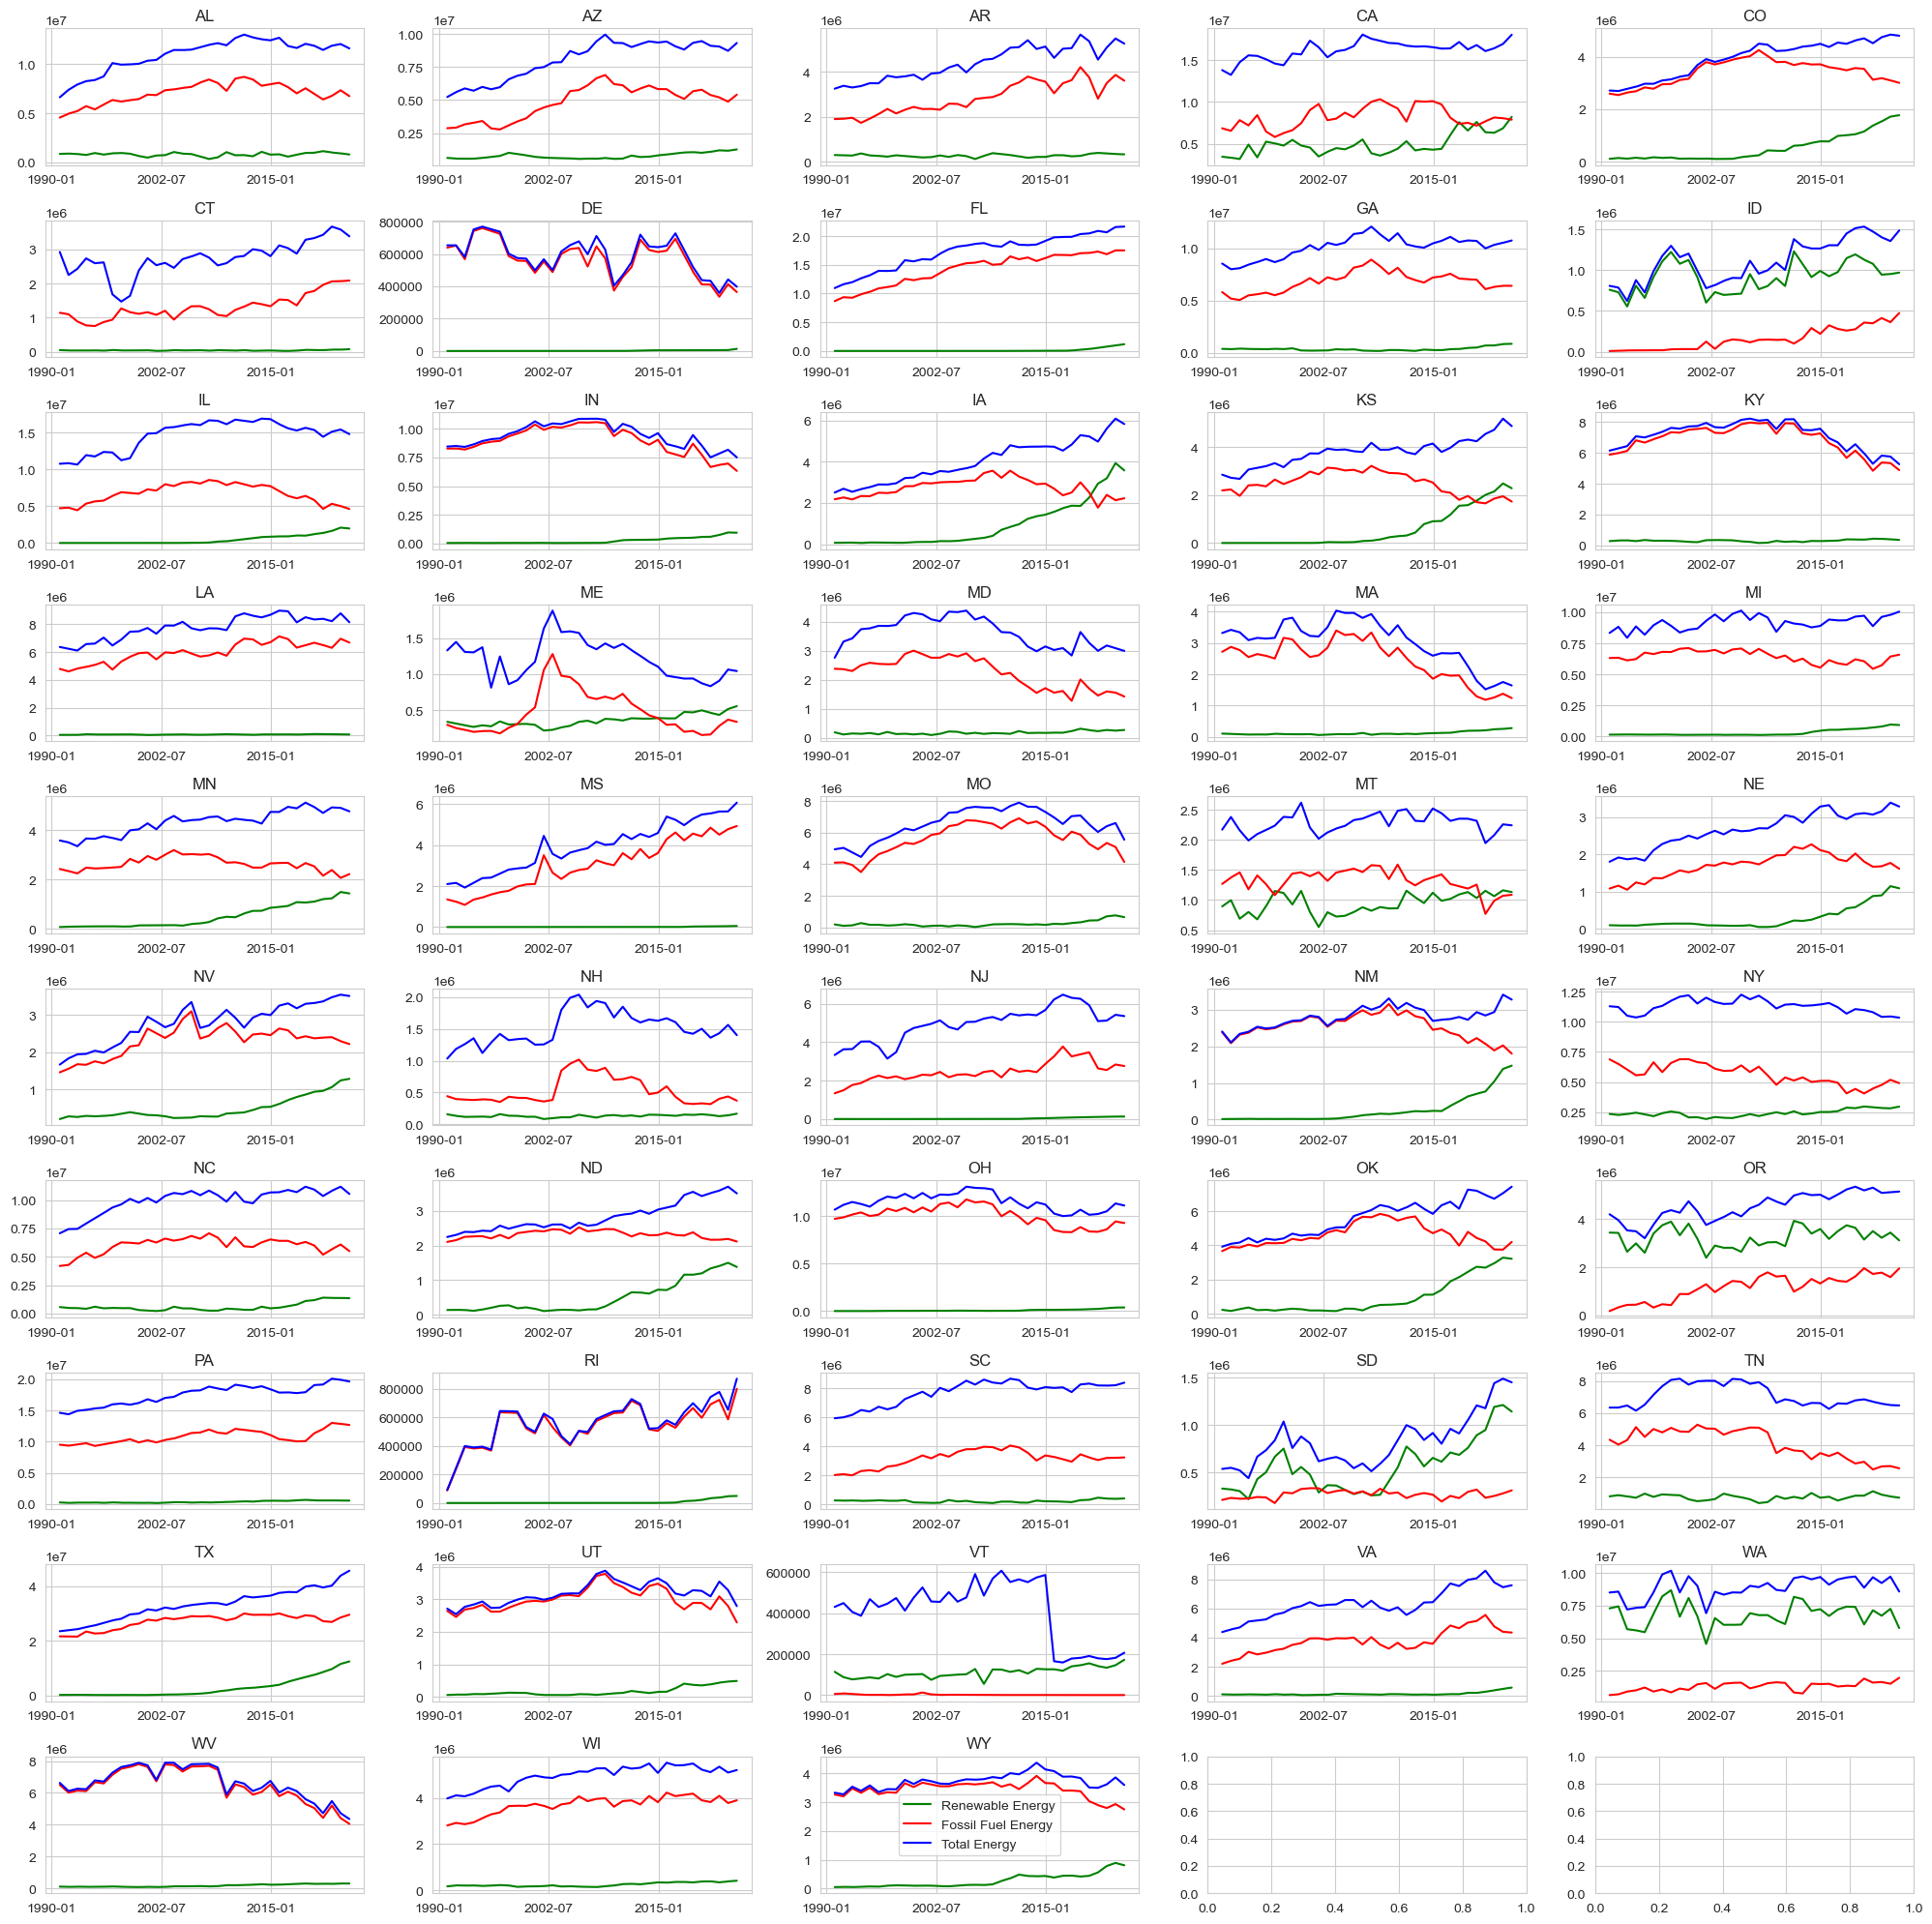

In [29]:
fig, ax = plt.subplots(10,5, figsize=(20,20))

for i,state in enumerate(states):
    ax = plt.subplot(10,5,i+1)
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]
    ax.plot(state_data['date'], state_data['monthly_energy_renew'], 'g', label='Renewable Energy')
    ax.plot(state_data['date'], state_data['monthly_energy_fossil'], 'r', label='Fossil Fuel Energy')
    ax.plot(state_data['date'], state_data['monthly_energy_total'], 'b', label='Total Energy')
    ax.set_title(state, fontsize=12)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.tight_layout()
plt.legend()
plt.show()


In [27]:
import statsmodels.api as sm

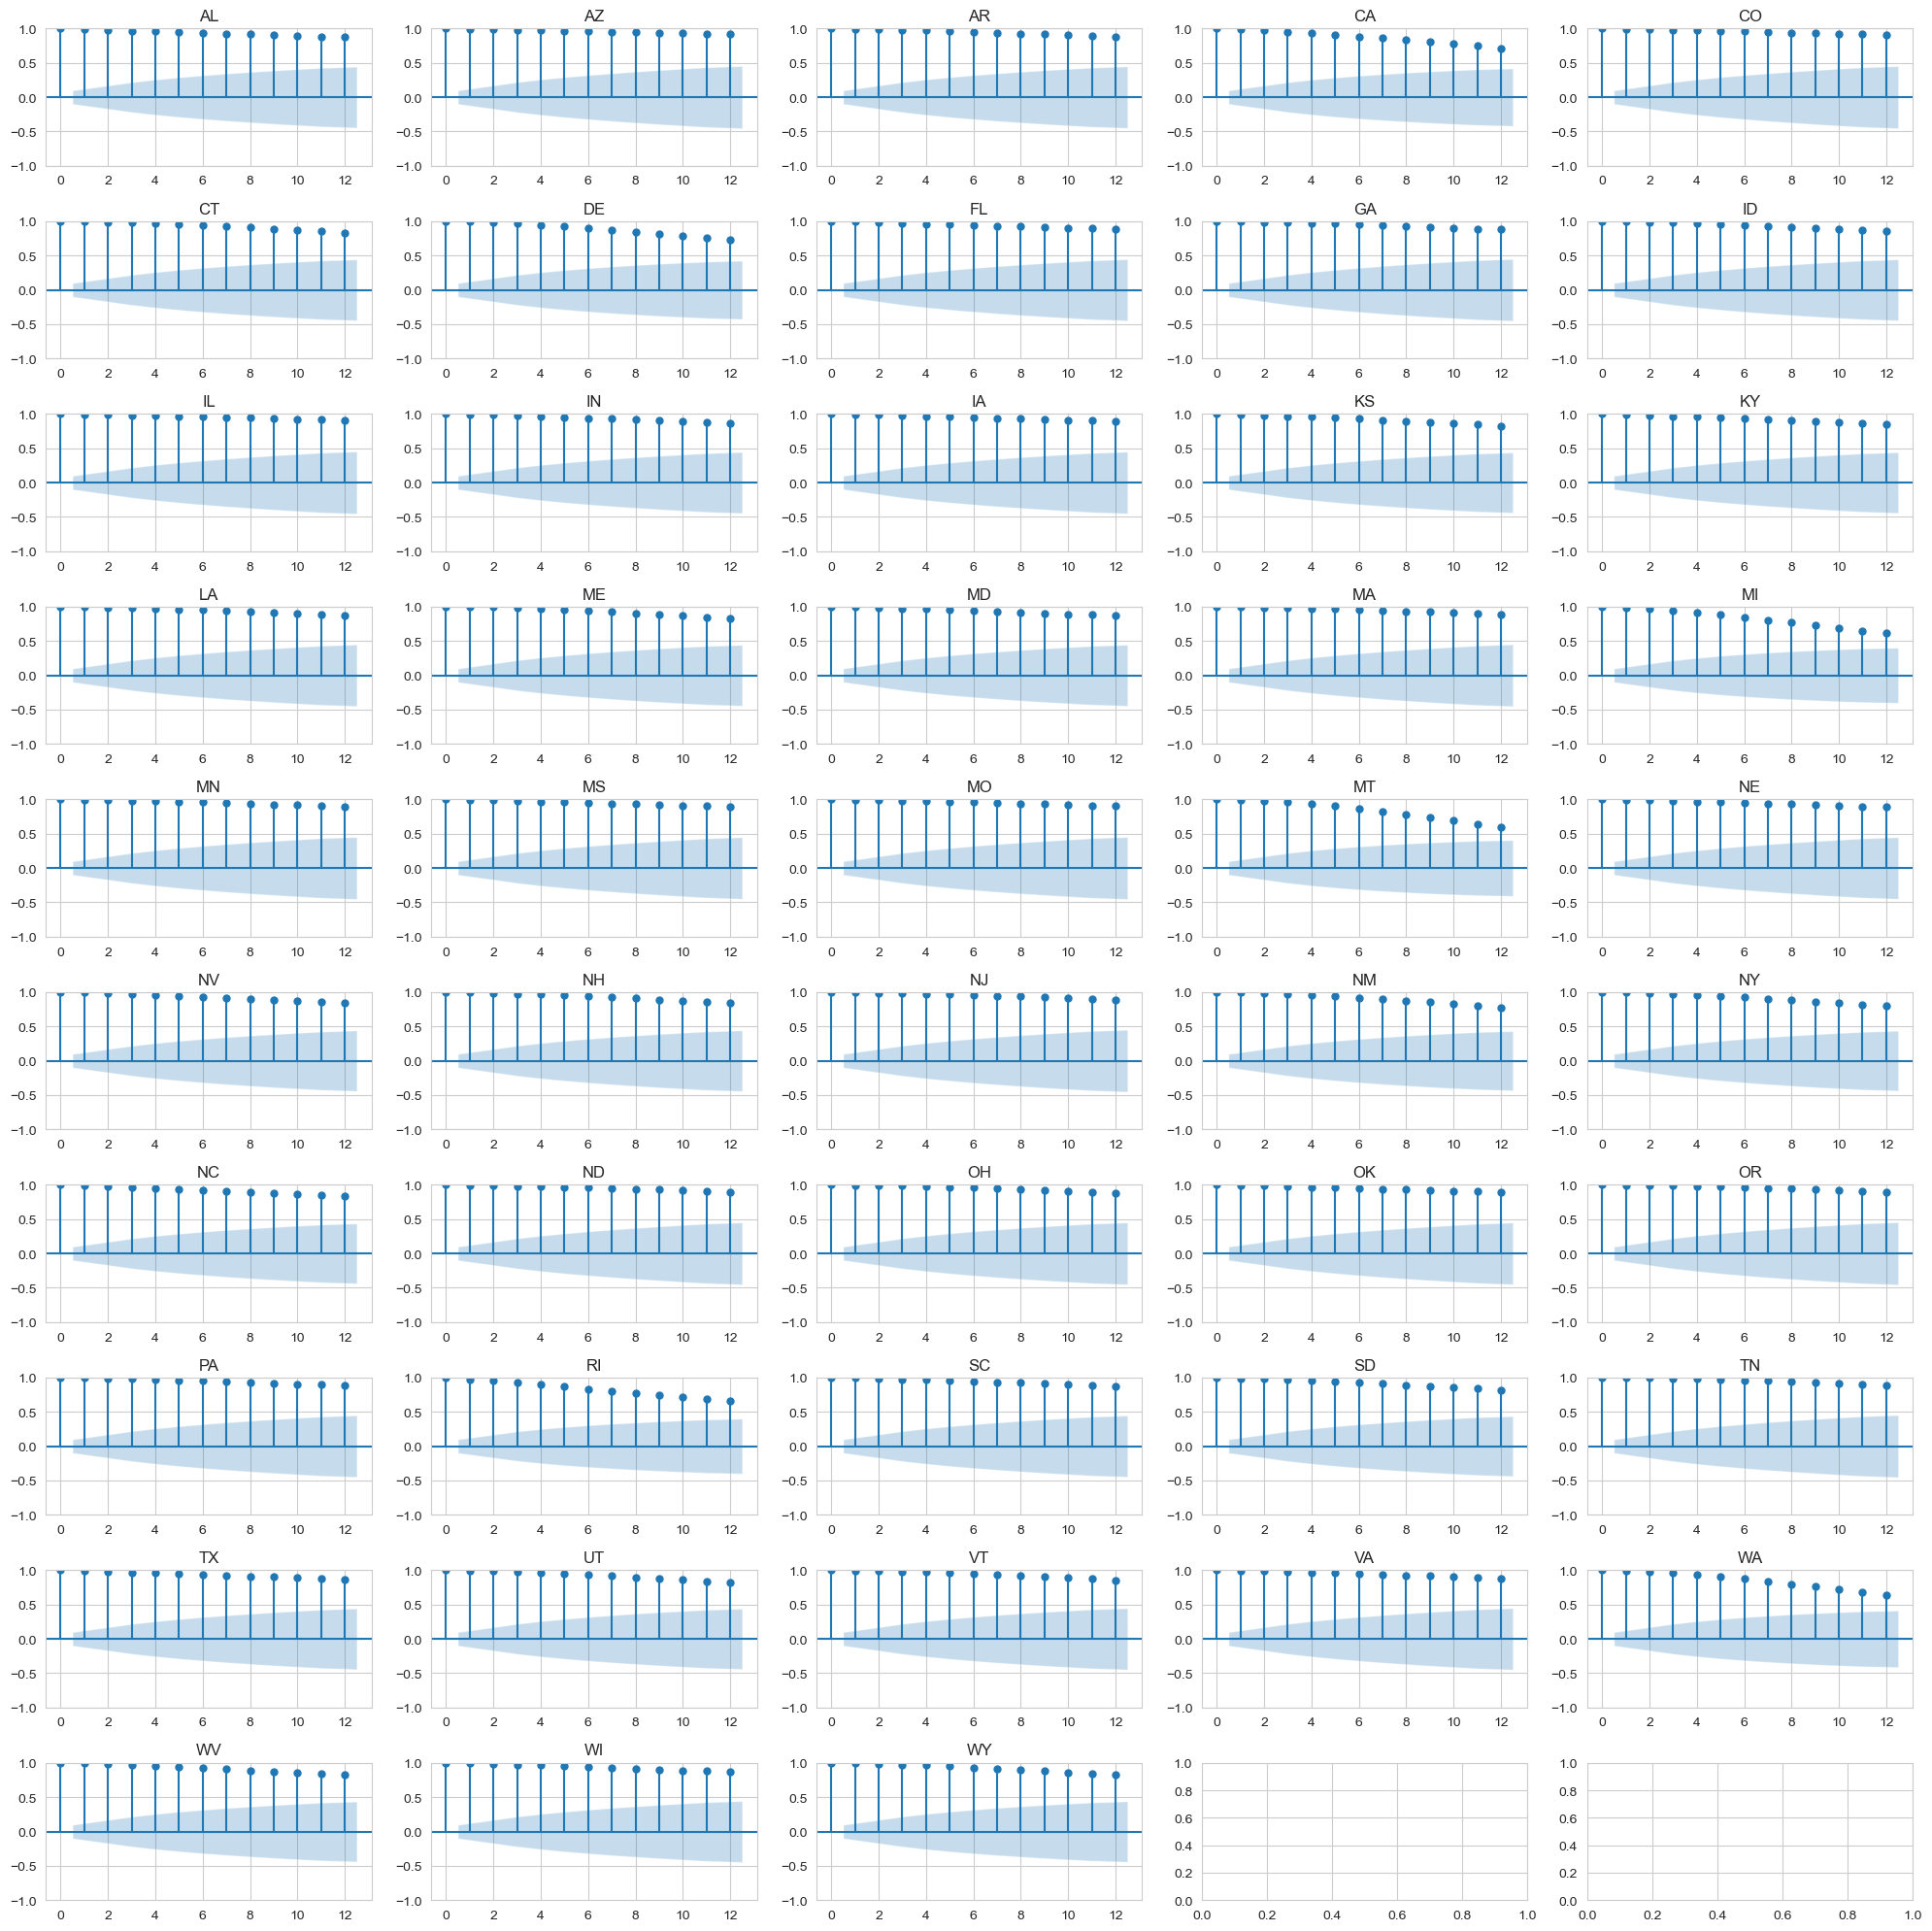

In [59]:
fig, ax = plt.subplots(10,5, figsize=(20,20))
ax = ax.flatten()

for i,state in enumerate(states):
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]['monthly_energy_total'].dropna()
    sm.graphics.tsa.plot_acf(state_data, lags=12, ax=ax[i], title=f'ACF-{state}')
    ax[i].set_title(state, fontsize=12)

plt.tight_layout()
plt.show()    

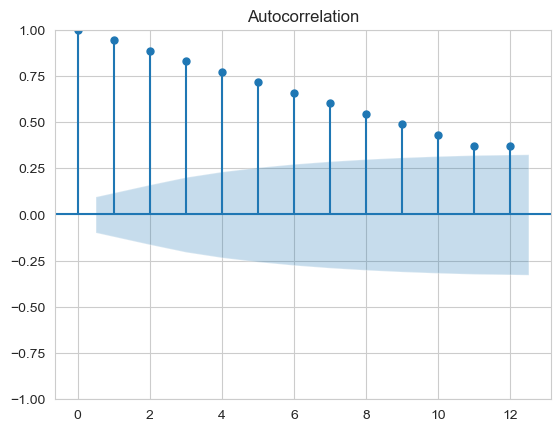

In [45]:
sm.graphics.tsa.plot_acf(energy_by_source_monthly.groupby(['date']).sum()['monthly_energy_total'], lags=12)
plt.show()


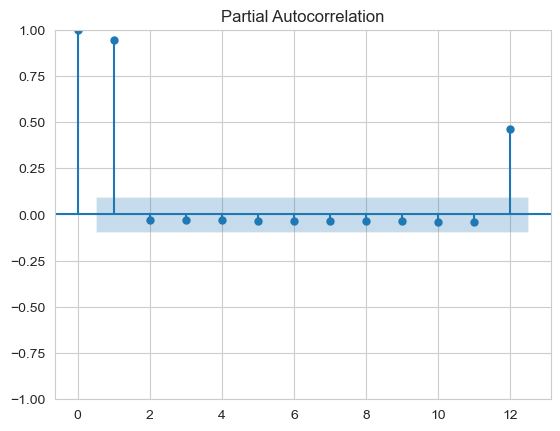

In [60]:
sm.graphics.tsa.plot_pacf(energy_by_source_monthly.groupby(['date']).sum()['monthly_energy_total'], lags=12)
plt.show()

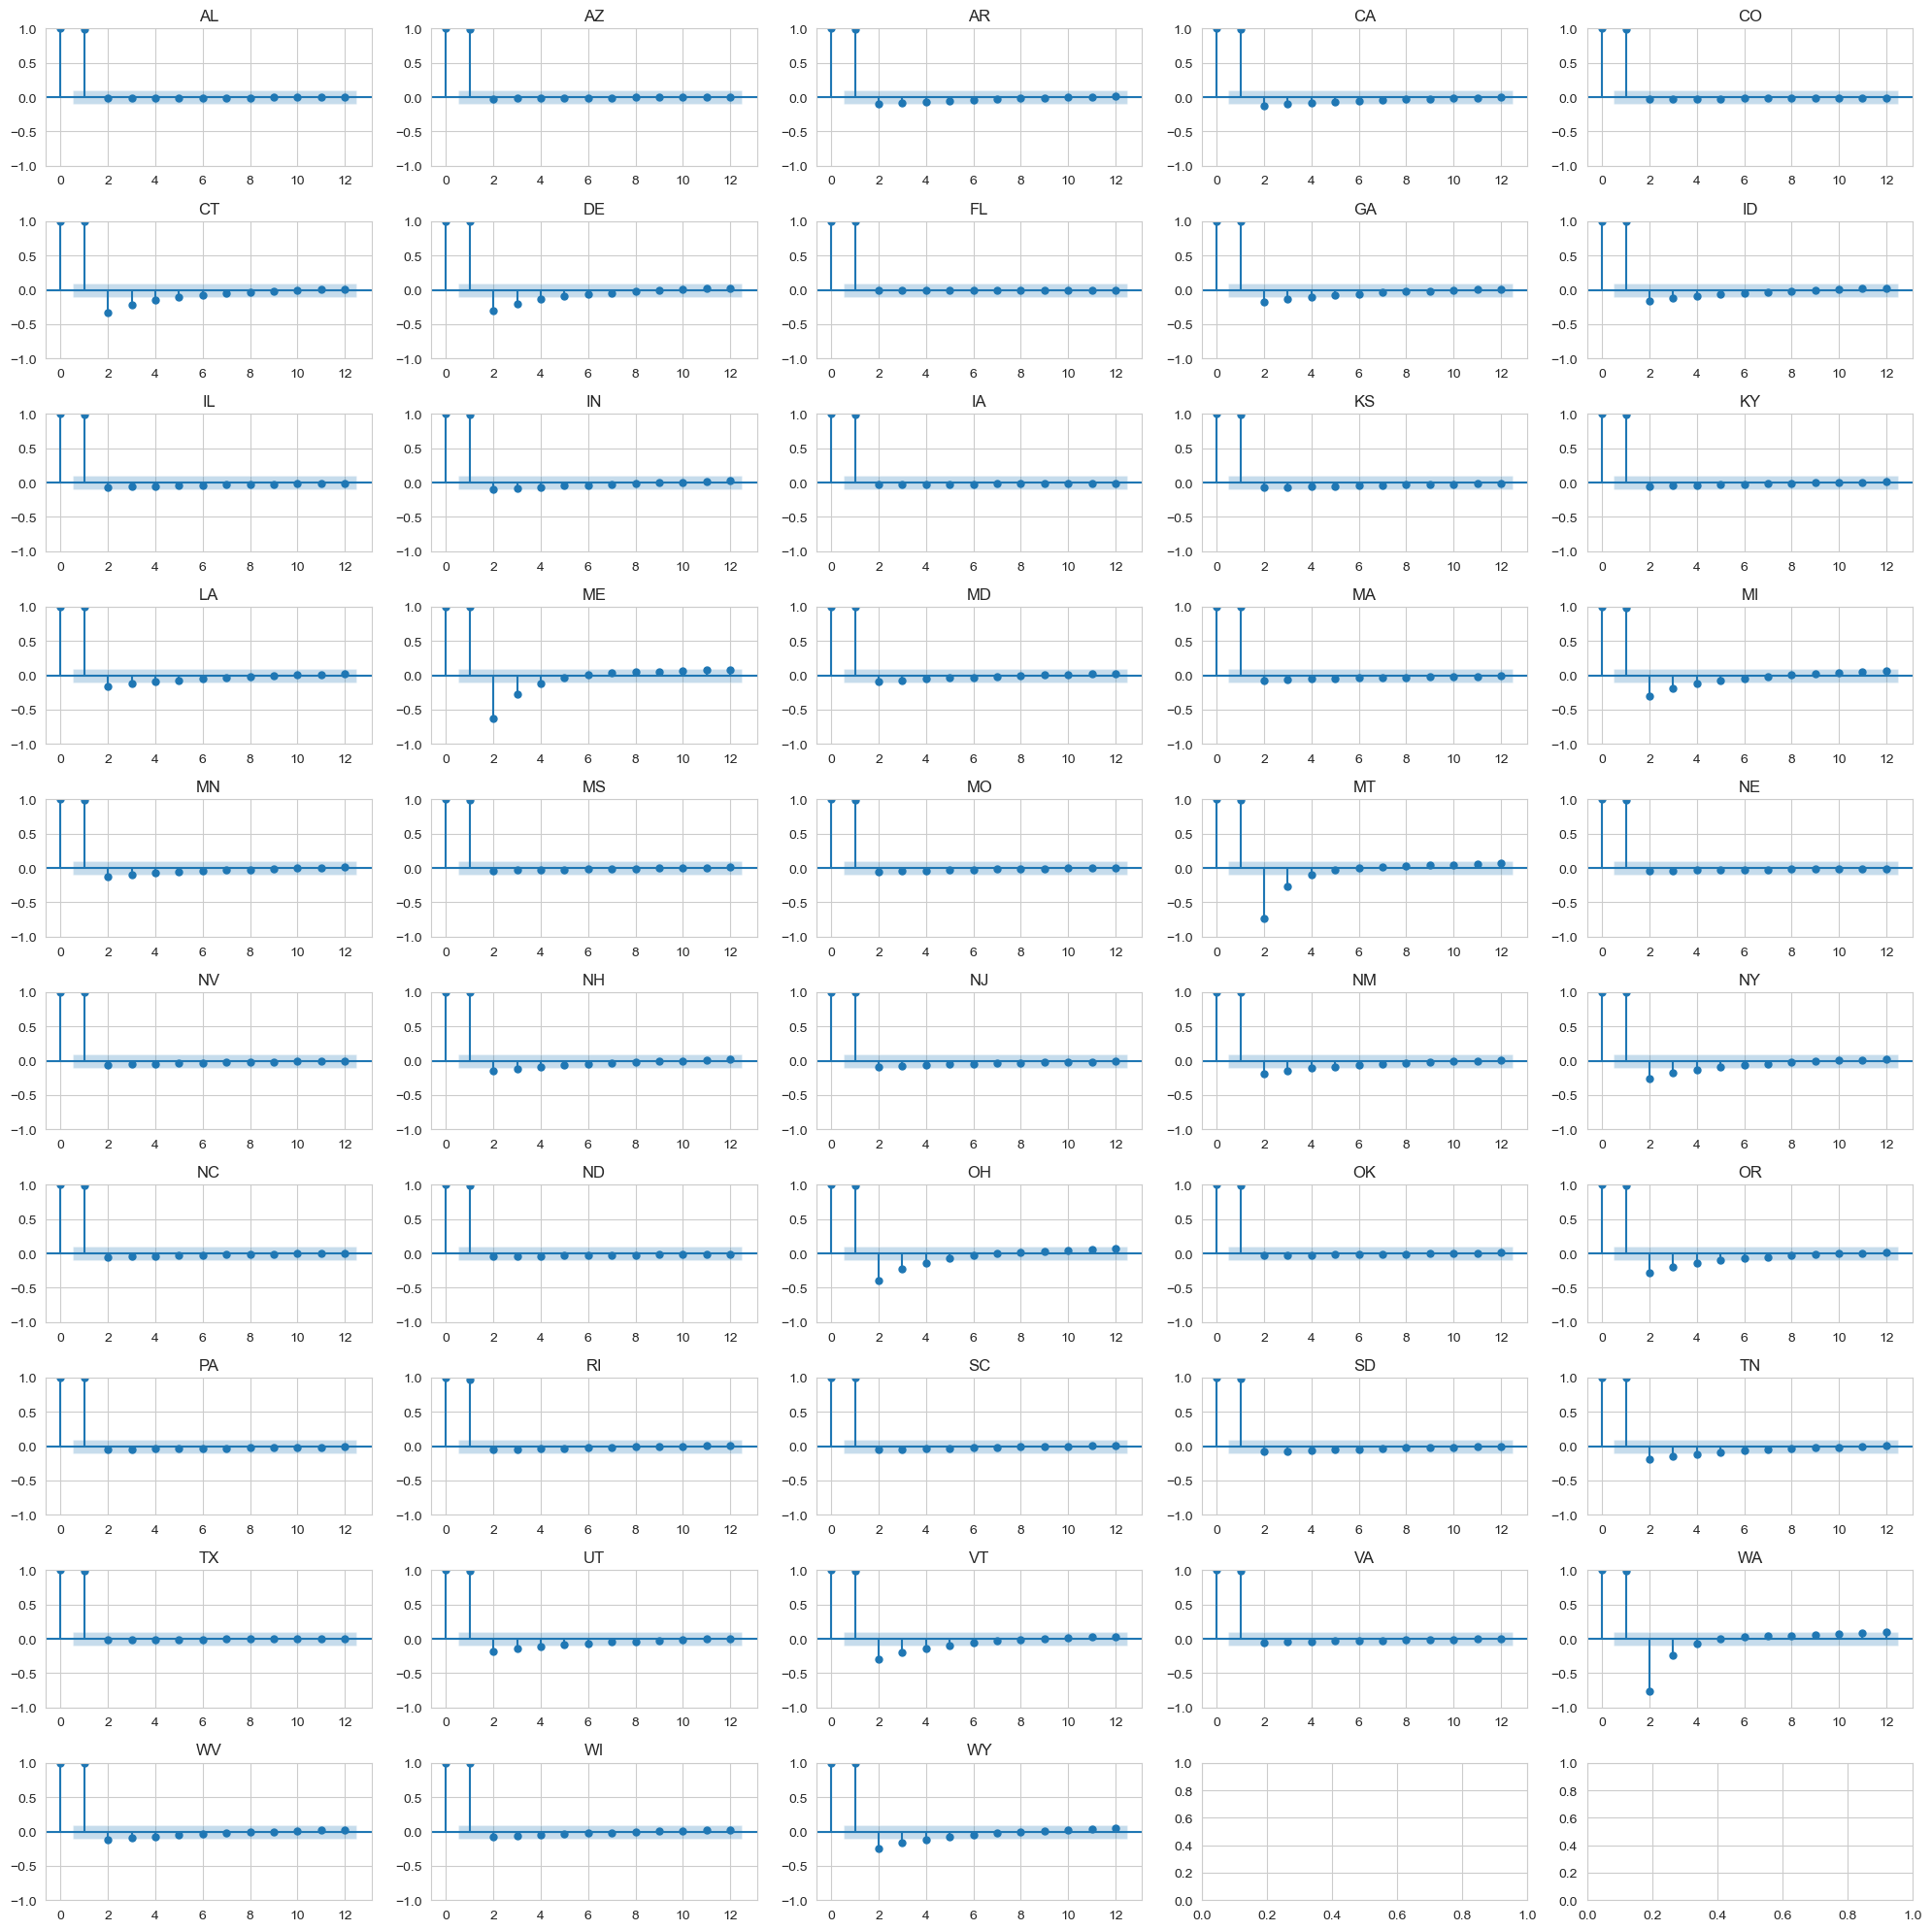

In [61]:
fig, ax = plt.subplots(10,5, figsize=(20,20))
ax = ax.flatten()

for i,state in enumerate(states):
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]['monthly_energy_total'].dropna()
    sm.graphics.tsa.plot_pacf(state_data, lags=12, ax=ax[i], title=f'ACF-{state}')
    ax[i].set_title(state, fontsize=12)

plt.tight_layout()
plt.show()   

In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
for state in states:
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]['monthly_energy_total'].dropna()
    result = adfuller(state_data)
    print(f'{state}: ADF Statistic: {result[0]}, p-value: {result[1]}')

AL: ADF Statistic: -2.8555921444926993, p-value: 0.05076109704413266
AZ: ADF Statistic: -1.663811131135233, p-value: 0.4498478455408679
AR: ADF Statistic: -1.27267972392513, p-value: 0.6415768672566259
CA: ADF Statistic: -2.2026382808934106, p-value: 0.2052893069743344
CO: ADF Statistic: -1.6250009132711718, p-value: 0.4701084998863069
CT: ADF Statistic: -1.9685814970940685, p-value: 0.3005165997782212
DE: ADF Statistic: -2.5364233445475595, p-value: 0.10686173064075055
FL: ADF Statistic: -1.7206873061912953, p-value: 0.4204865057430657
GA: ADF Statistic: -2.266034349431076, p-value: 0.1831566158502319
ID: ADF Statistic: -2.0214686296137963, p-value: 0.277239902618455
IL: ADF Statistic: -2.2515069337023808, p-value: 0.18808495408102388
IN: ADF Statistic: -0.8151194234526552, p-value: 0.8146404585480589
IA: ADF Statistic: 0.0072540134250426574, p-value: 0.9591278923474348
KS: ADF Statistic: -0.9113032657413694, p-value: 0.7842273029723046
KY: ADF Statistic: -0.25430911746339935, p-value

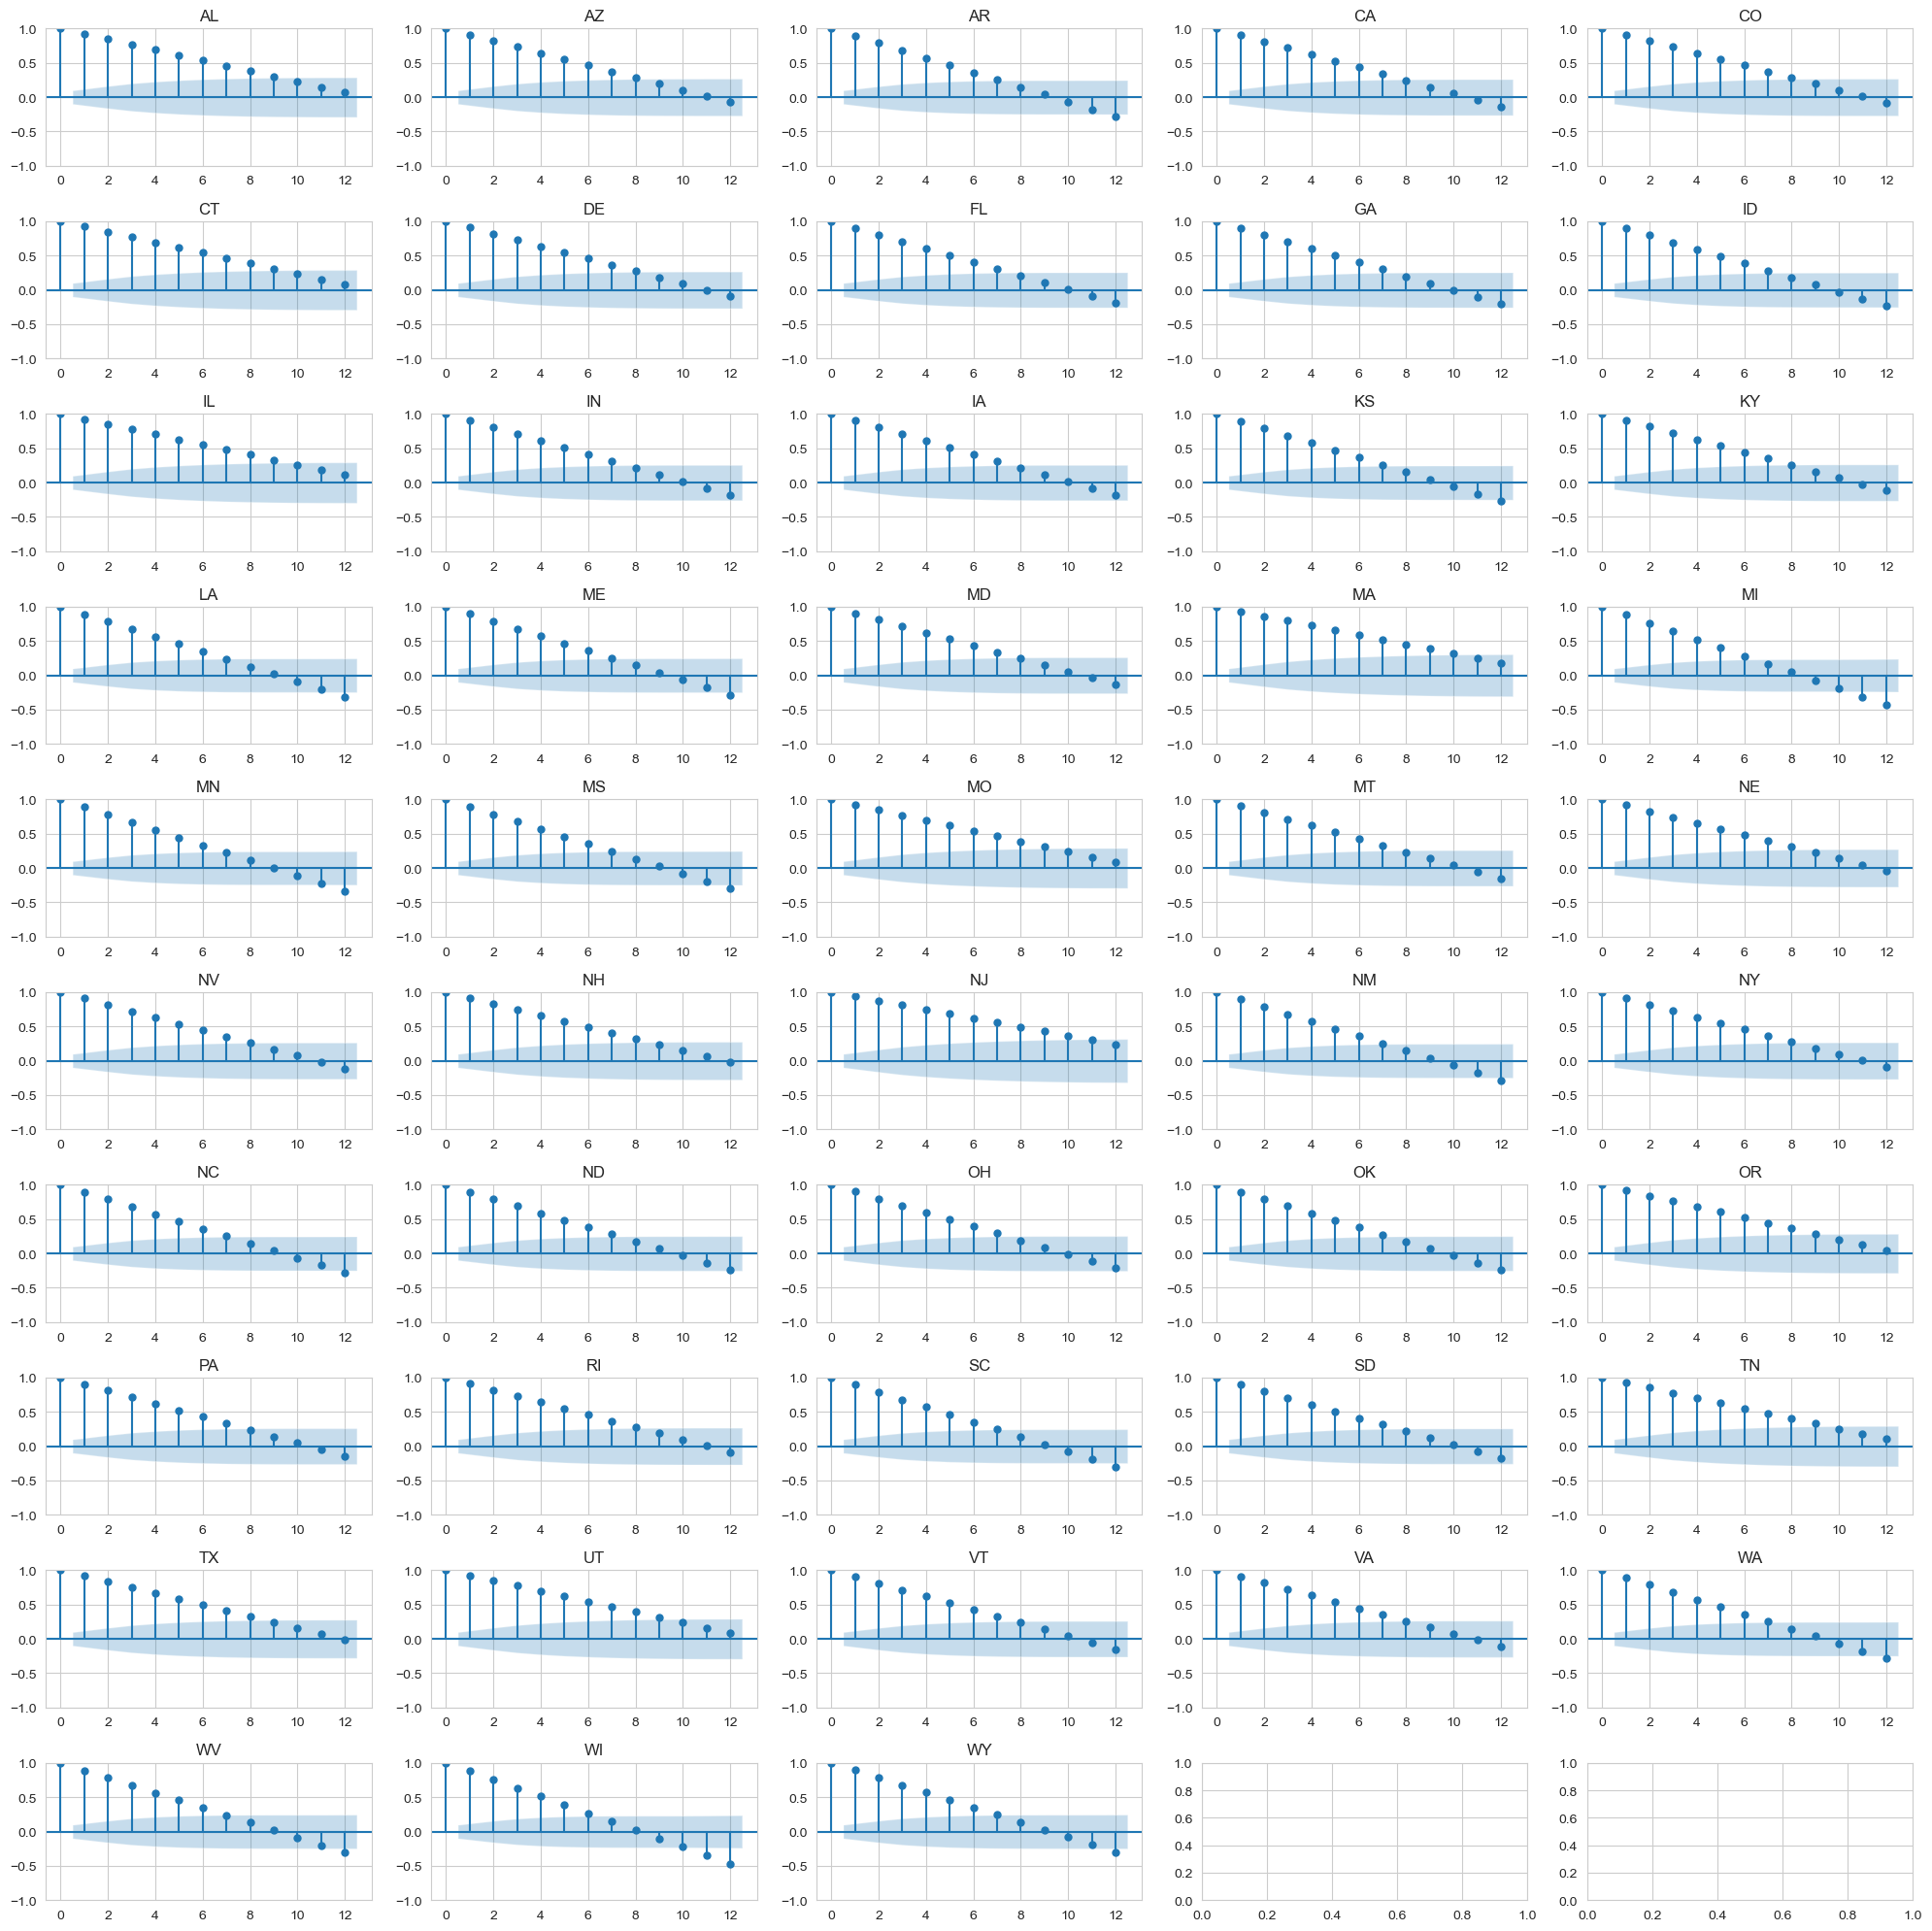

In [99]:
fig, ax = plt.subplots(10,5, figsize=(20,20))
ax = ax.flatten()

for i,state in enumerate(states):
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]['monthly_energy_total'].dropna()
    diff_data = state_data.diff()[1:]
    sm.graphics.tsa.plot_acf(diff_data, lags=12, ax=ax[i], title=f'ACF-{state}')
    ax[i].set_title(state, fontsize=12)

plt.tight_layout()
plt.show()    

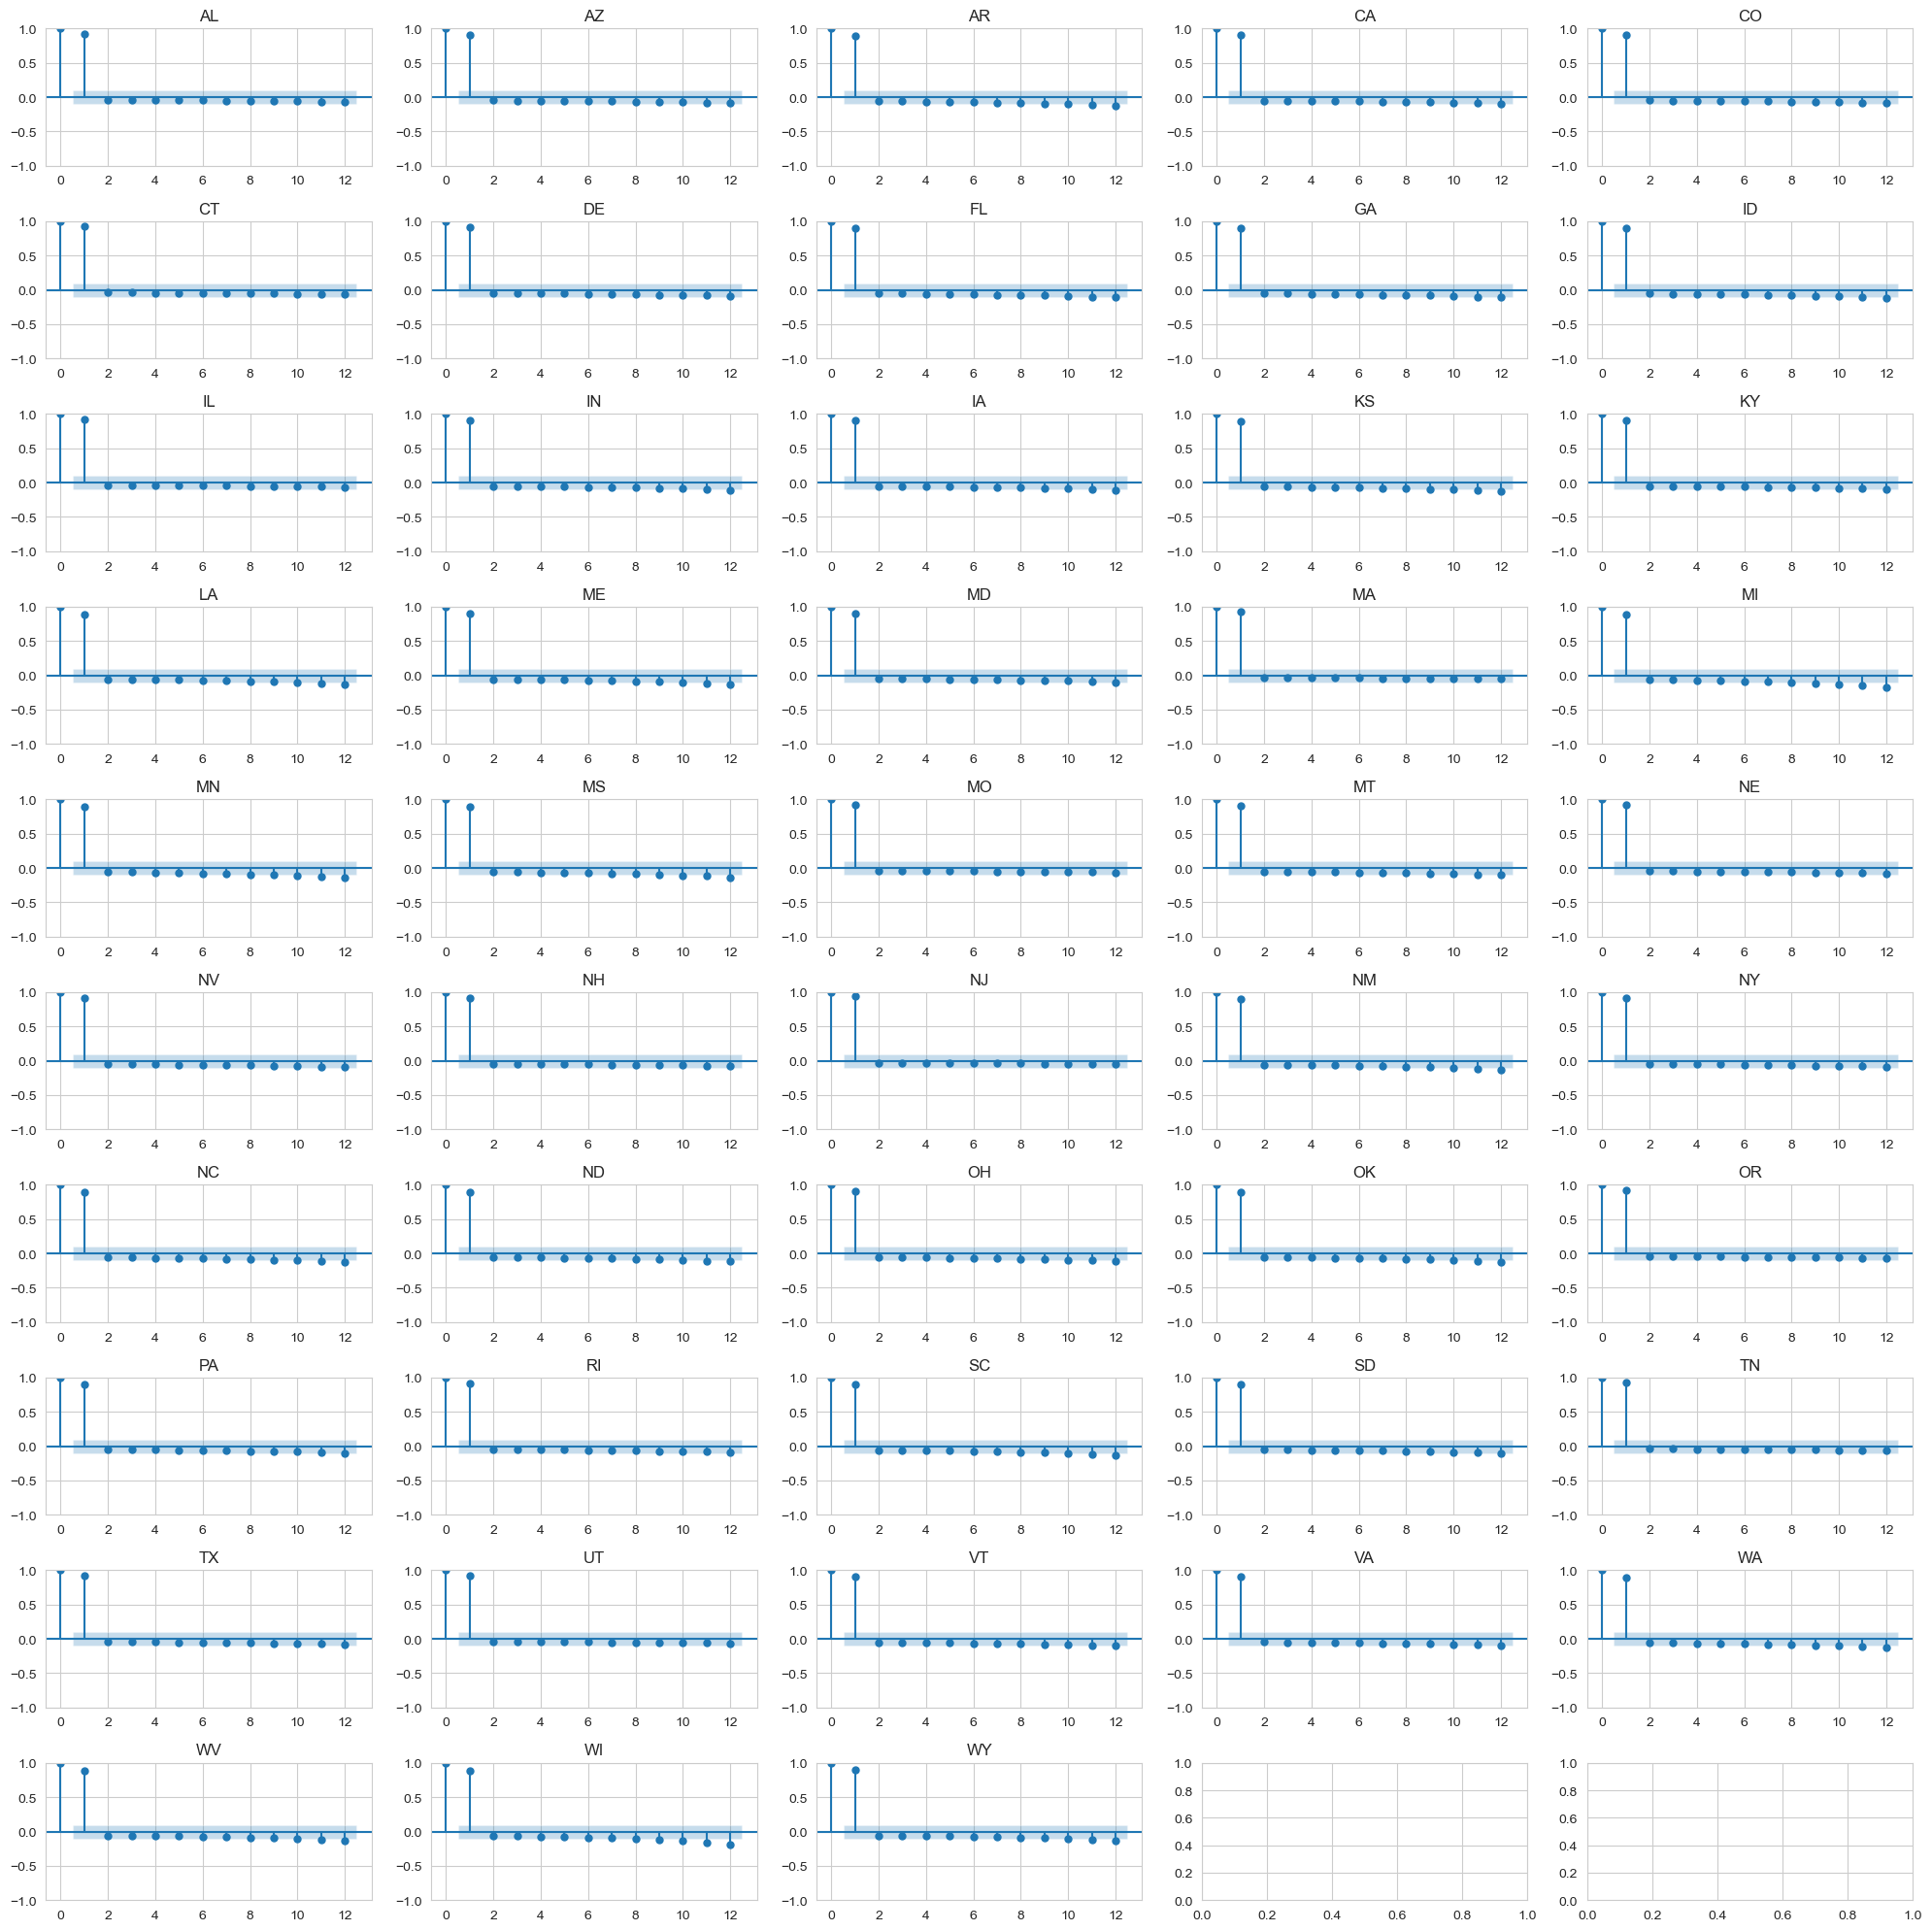

In [100]:
fig, ax = plt.subplots(10,5, figsize=(20,20))
ax = ax.flatten()

for i,state in enumerate(states):
    state_data = energy_by_source_monthly[energy_by_source_monthly['state'] == state]['monthly_energy_total'].dropna()
    diff_data = state_data.diff()[1:]
    sm.graphics.tsa.plot_pacf(diff_data, lags=12, ax=ax[i], title=f'ACF-{state}')
    ax[i].set_title(state, fontsize=12)

plt.tight_layout()
plt.show()  